<h1 style="color:Tomato;text-align:center;">Spam Text Classification</h1>

<h2 style="color:blue;">Spam Text Classigication done using </h2>
<h4 style="font-size:150%;">
<ul>
  <li style="color:blue;">Bag of Words (BoW)</li>
  <li style="color:blue;">ScikitLearn</li>
</ul>  
</h4>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

 <h2 style="color:blue;">Load SPAM dataset</h2>

In [3]:
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

 <h2 style="color:blue;">Exploratory Data Analysis</h2>

In [7]:
spam = df[df['label']=='spam']
ham = df[df['label']=='ham']

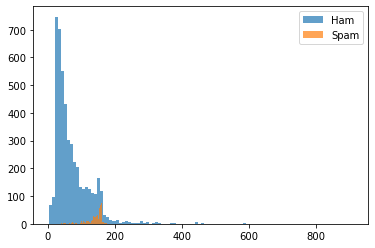

In [8]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

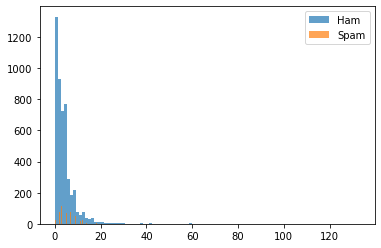

In [9]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

 <h2 style="color:blue;">Data preparation for Training</h2>

In [11]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
tfidf  =  TfidfVectorizer()

In [13]:
X = tfidf.fit_transform(df['message'])

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [14]:
X =  X.toarray()

In [16]:
X.shape

(5572, 8713)

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, df['label'], test_size=0.3, random_state=42, stratify = df['label'])

In [20]:
X_train.shape,  X_test.shape, y_train.shape

((3900, 8713), (1672, 8713), (3900,))

 <h2 style="color:blue;"> Classifier Model</h2>

#### Using RandomForest

In [43]:
clf = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred )

array([[1448,    0],
       [  44,  180]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred )

0.9736842105263158

In [48]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

